In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
% matplotlib inline

In [2]:
questions_final = pd.read_csv('questions_final.csv')
professions_final = pd.read_csv('professionals_final.csv')

In [18]:
questions = pd.read_csv('questions.csv')
answers = pd.read_csv('answers.csv')

# Days since professionals joined versus Amount of questions each prof answered

Text(0,0.5,'Days since joined')

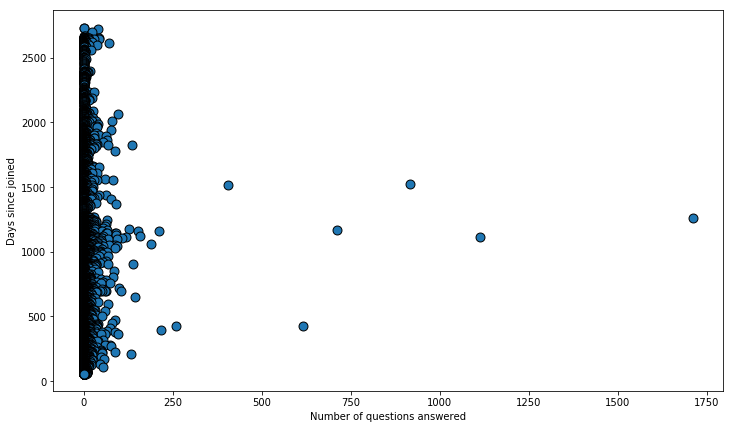

In [16]:
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(professions_final['how_many_questions_answered'], professions_final['length_since_joined'], s=80, edgecolors='k')
ax.set_xlabel('Number of questions answered')
ax.set_ylabel('Days since joined')

# Number of answers posted versus Number of comments posted

Text(0,0.5,'Number of comments posted')

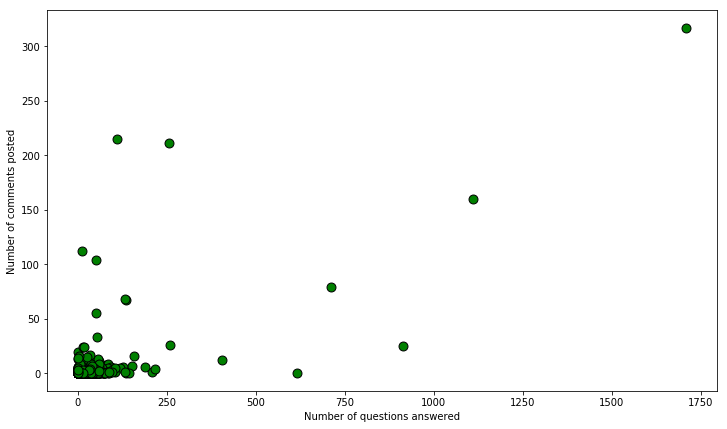

In [17]:
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(professions_final['how_many_questions_answered'], professions_final['comment_count'], s=80, edgecolors='black', c='g')
ax.set_xlabel('Number of questions answered')
ax.set_ylabel('Number of comments posted')

# Num of Questions and Answers posted on CareerVillage by year

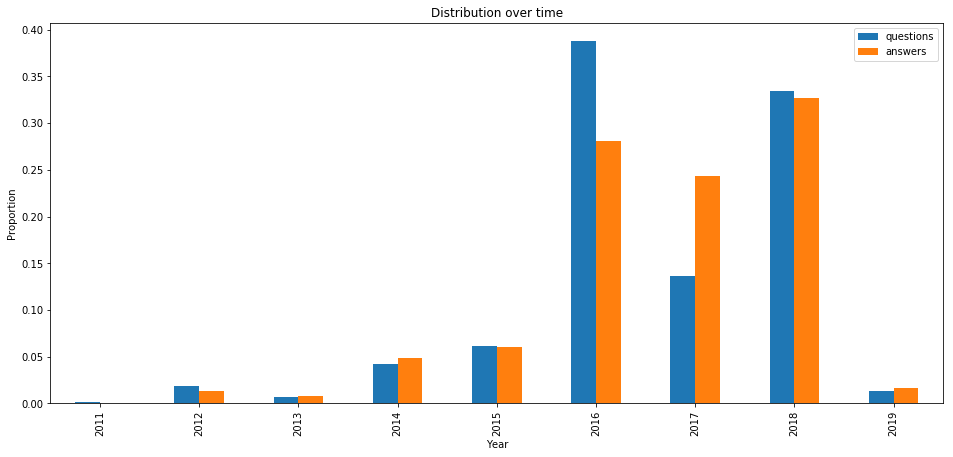

In [31]:
answers['answers_date_added'] = pd.to_datetime(answers['answers_date_added'])
questions['questions_date_added'] = pd.to_datetime(questions['questions_date_added'])

plt_questions = (questions.groupby([questions['questions_date_added'].apply(lambda x: x.year)]).size()/len(questions.index))
plt_answers = (answers.groupby([answers['answers_date_added'].apply(lambda x: x.year)]).size()/len(answers.index))

plt_data = pd.DataFrame({'questions': plt_questions,
                        'answers':plt_answers})
plt_data.plot(kind='bar', figsize=(16, 7))
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('Distribution over time')
plt.show()

# Questions' authors location, industry distribution

In [32]:
col_to_plot_cat = ['students_location', 'professionals_location', 'professionals_industry',
                   'groups_group_type']
col_to_plot_num = ['score', 'time_delta']

questions_final[col_to_plot_cat].fillna('Missing', inplace=True)

/Users/qisideng/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [33]:
def plot_cat(df):
    '''
    Produce barplots for categorical columns in df
    '''
    
    col_names = df.columns
    for col in col_names:
        plt_data = pd.DataFrame(df[col].value_counts()[1:21]/len(df))
        plt_title = '{}: 20 Most frequent plots'.format(col)
        plt_data.plot(kind='bar', title = plt_title, figsize=(14,8))  

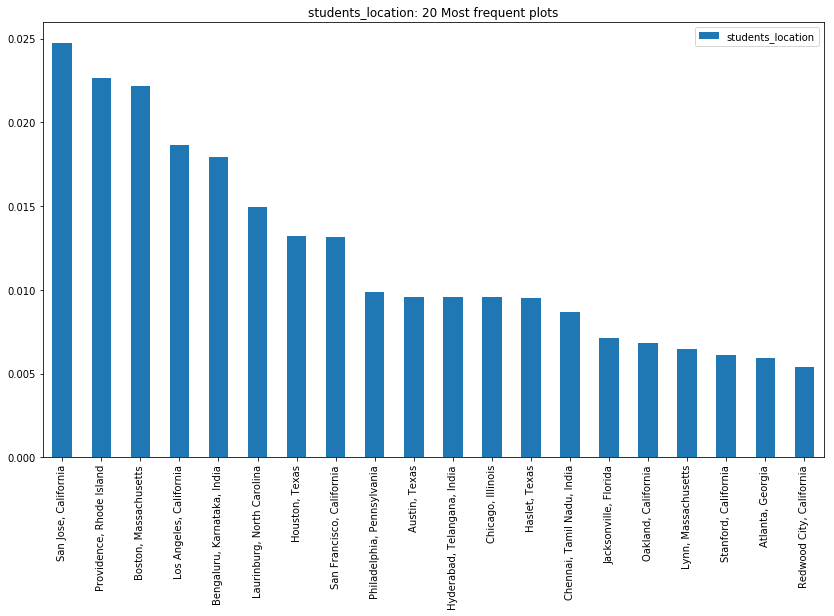

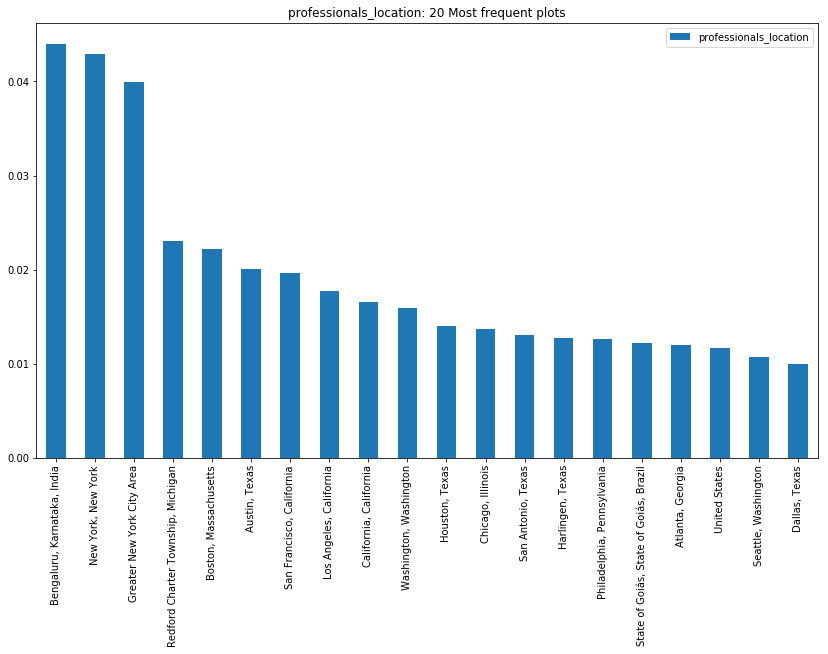

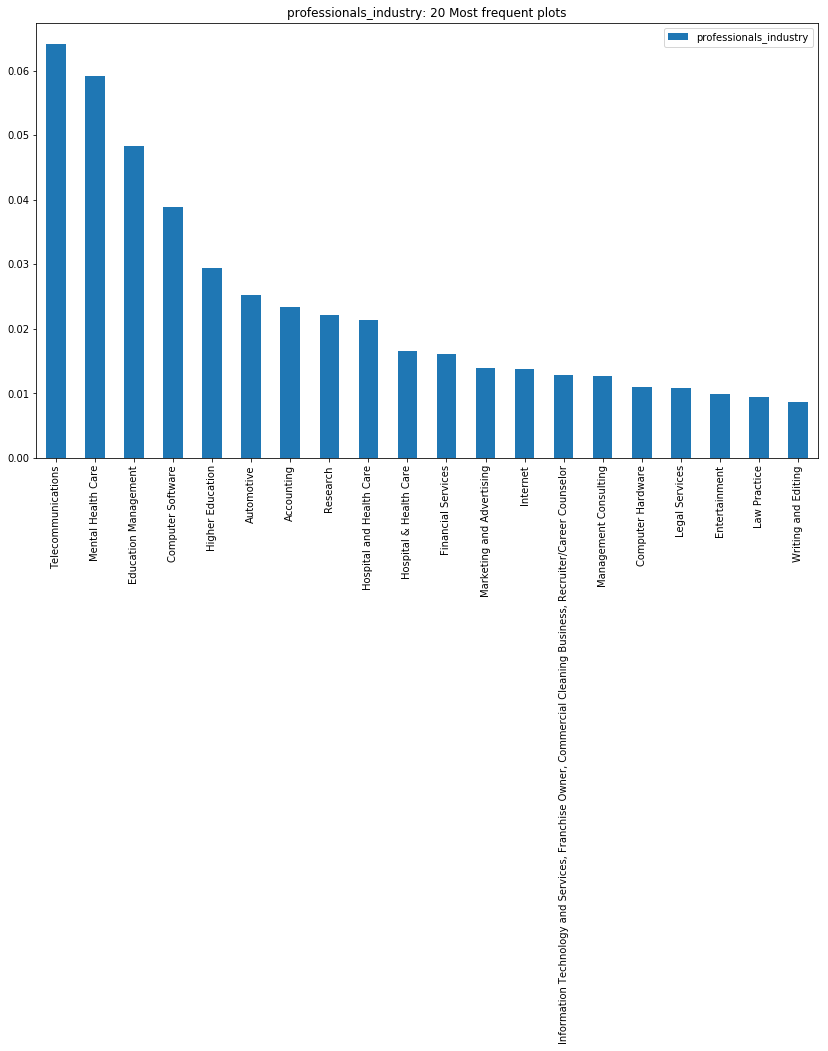

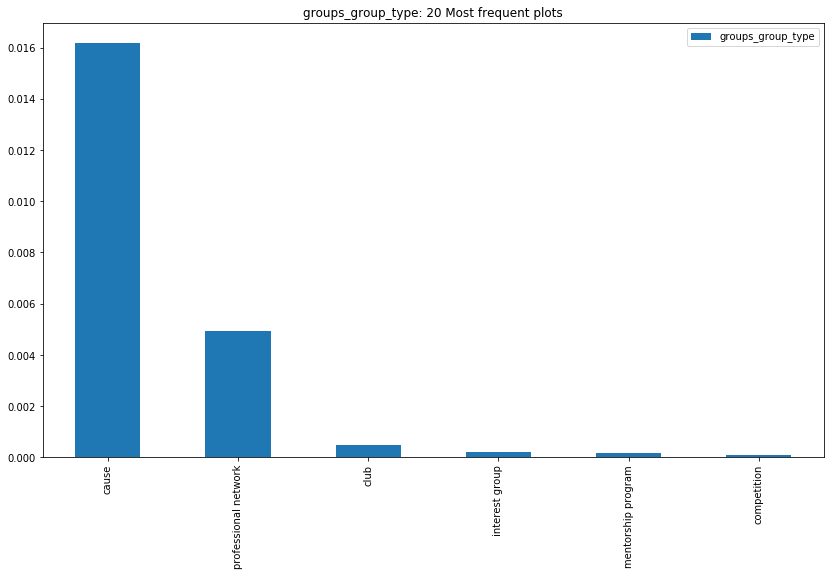

In [35]:
plot_cat(questions_final[col_to_plot_cat])

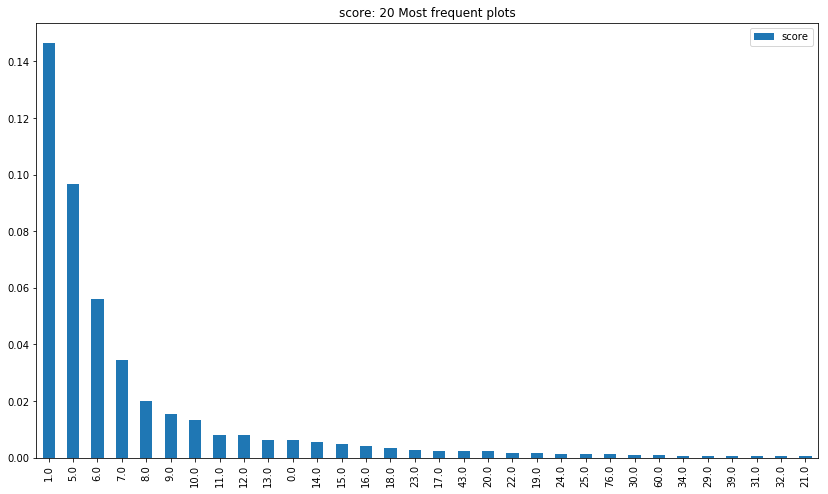

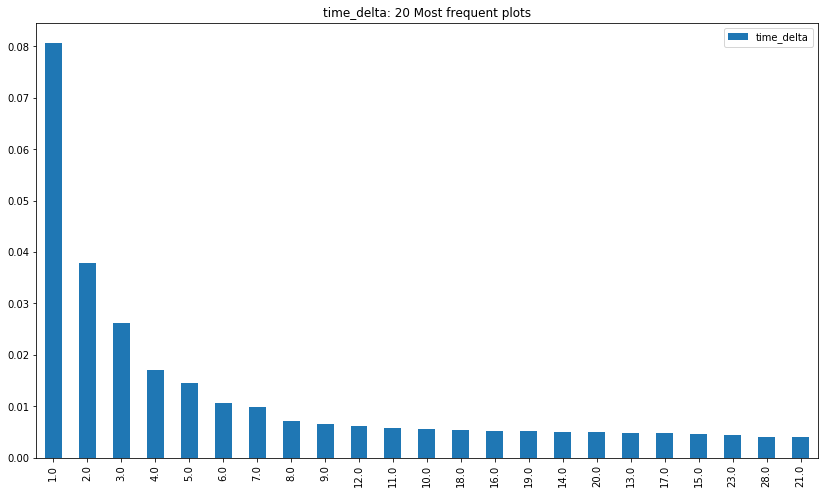

In [37]:
plot_cat(questions_final[col_to_plot_num])

# Active professionals versus Inactive professionals

Inactive professional, by definition, refers to those professionals (or students who are eligible for answering questions) who hasn't posted a single answer ever since joined.

In [38]:
all_active_professionals = professions_final[(professions_final['how_many_questions_answered'] > 0)]

In [44]:
info_df = pd.DataFrame({'active': len(all_active_professionals),
                          'inactive': len(professions_final) - len(all_active_professionals)}, index=['col']).T

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a0c808908>],
      dtype=object)

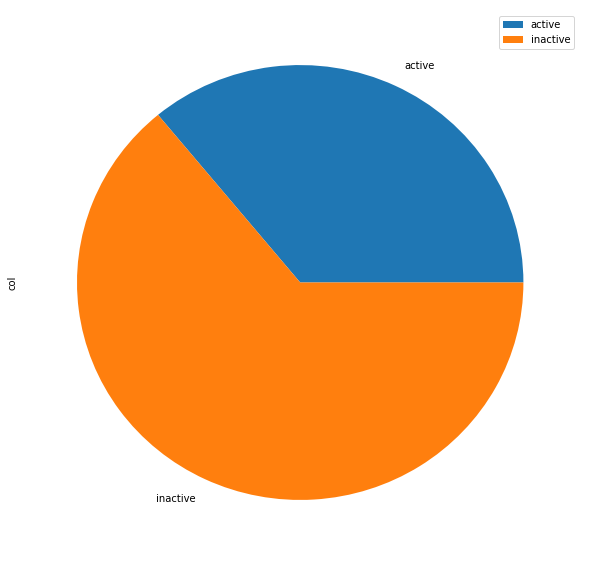

In [46]:
info_df.plot.pie(figsize=(10,10), subplots=True)

# Distribution of TIME_DELTA

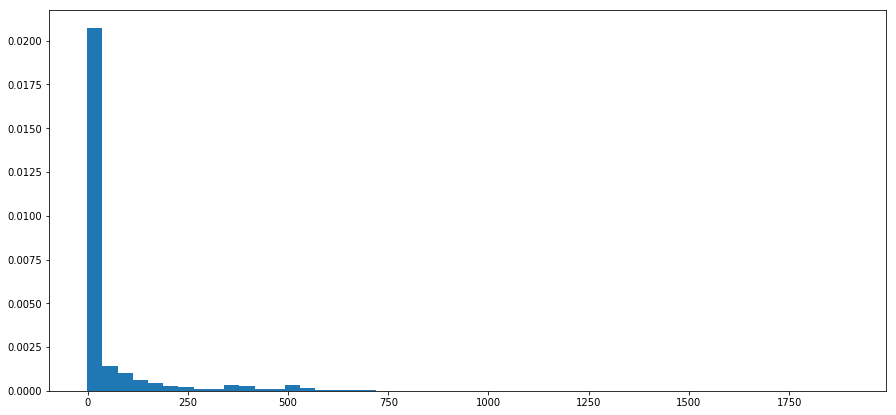

In [48]:
time_delta = questions_final['time_delta'].fillna(0)
plt.figure(figsize=(15,7))
plt.hist(x = time_delta, bins = 50, density=True)
plt.show()